In [38]:
from utils import list_change
import pandas as pd
import numpy as np
import glob
from keras import Sequential
from keras.layers import LSTM, Dense
import copy
import matplotlib.pyplot as plt
from utils import split_dataset, restore_changes
import os
import tensorflow as tf
import cv2

In [39]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')
# print(tf.__version__)
# tf.test.is_gpu_available()

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [40]:
# def formating(X, Y):
#     x_test = []
#     y_test = []
#     for x, y in zip(X, Y):
#         x_test+=x[0].tolist()
#         y_test+=y[0].tolist()
#     return np.array(x_test), np.array(y_test)
def formating(X, Y):
    x_test = []
    y_test = []
    for x, y in zip(X, Y):
        x_test+=x.tolist()
        y_test+=y.tolist()
    return np.array(x_test), np.array(y_test)

In [41]:
files = glob.glob('CutFrame_Output/output*/use2.txt')
data = [list_change(f) for f in files]

In [42]:
data=[]
for _dir in glob.glob('CutFrame_Output/output*/'):
    data.append([list_change(f) for f in glob.glob(_dir+'use*.txt')])
data = np.array(data)

In [43]:
len(data)

149

In [44]:
data = data.reshape(len(data),7,6)  #  7 frames 不可随意更改

In [45]:
print(data[0])

[[  35.   65.  125.  -58. -181.  455.]
 [-161.  110.  -48.   31. -189.  480.]
 [-168.  151. -246.  190. -121.  457.]
 [ -73.  145. -171.  208.  -34.  359.]
 [ -40.  162.  -57.  190.  -20.  297.]
 [-146.  161. -283.  234.  -52.  392.]
 [-156.  114.  -54.    7. -123.  429.]]


In [46]:
# dataf = [pd.DataFrame(i,copy=True) for i in data]
# dataf

In [103]:
X = copy.deepcopy(data)
Y = copy.deepcopy(data)
# X = np.array([np.delete(i, -1, axis=0) for i in X])
# Y = np.array([np.delete(i, 0, axis=0) for i in Y])
X = np.delete(X, -1, axis=0)
Y = np.delete(Y, 0, axis=0)

In [104]:
print(list(zip(X,Y)))

[(array([[  35.,   65.,  125.,  -58., -181.,  455.],
       [-161.,  110.,  -48.,   31., -189.,  480.],
       [-168.,  151., -246.,  190., -121.,  457.],
       [ -73.,  145., -171.,  208.,  -34.,  359.],
       [ -40.,  162.,  -57.,  190.,  -20.,  297.],
       [-146.,  161., -283.,  234.,  -52.,  392.]]), array([[-161.,  110.,  -48.,   31., -189.,  480.],
       [-168.,  151., -246.,  190., -121.,  457.],
       [ -73.,  145., -171.,  208.,  -34.,  359.],
       [ -40.,  162.,  -57.,  190.,  -20.,  297.],
       [-146.,  161., -283.,  234.,  -52.,  392.],
       [-156.,  114.,  -54.,    7., -123.,  429.]])), (array([[  36.,   69.,  105.,  -52., -166.,  461.],
       [-178.,   95.,  -55.,    7., -171.,  483.],
       [-169.,  144., -265.,  160.,  -89.,  449.],
       [ -52.,  164.,  -80.,  182.,  -14.,  342.],
       [ -39.,  161.,  -65.,  209.,  -33.,  302.],
       [-149.,  174., -272.,  243.,  -84.,  414.]]), array([[-178.,   95.,  -55.,    7., -171.,  483.],
       [-169.,  144.,

In [48]:
len(X)

148

In [49]:
X, X_val, X_test, Y, Y_val, Y_test = split_dataset(X, Y)
# X_test, Y_test = formating(X_test, Y_test)
X_test=X_test
Y_test=Y_test

In [50]:
index = 0
points = restore_changes(X[index],index,None)
# points = ['pass']+points
# del(points[-1])
for n,f in enumerate(points):
    # if n==0:
    #     continue0
    img = cv2.imread(f'./CutFrame_Output/output{index}/frame_{n}.png')
    for q,p in enumerate(f):
        # print((p[0], p[1]))
        cv2.circle(img, (int(p[0]), int(p[1])), 3, (0, 255, 0), -1)
        cv2.putText(img, str(q), (int(p[0]), int(p[1])), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.imwrite(f'outputs/ori/output{n}.png', img)

In [51]:
X_test.shape

(15, 7, 6)

### test

In [52]:
# X = np.array([[X[0]]])
# Y = np.array([[Y[0]]])
# X_test = X[0]
# Y_test = Y[0]

In [53]:
X.shape

(118, 7, 6)

### test end

In [55]:
l=[]
l0=[]
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(6))
model.compile(optimizer='adam', loss='mse')

history = model.fit(X, Y, epochs=500, batch_size=118, validation_data=(X_test, Y_test), verbose=1, shuffle=False)

# minimum_loss = float('inf')
# for epoch in range(2000):
    # for x, y in zip(X, Y):
    #     loss = model.train_on_batch(x, y)
    # print(epoch,end=': ')
    # l0.append(model.evaluate(X_test, Y_test))
    # if l0[-1] < minimum_loss:
    #         minimum_loss = l0[-1]
    #         model.save('best.h5')

2024-08-24 10:44:10.781138: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-24 10:44:10.781206: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-24 10:44:10.781222: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-24 10:44:10.993698: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-24 10:44:10.993745: I external/local_xla/xla/stream_executor

Epoch 1/500


2024-08-24 10:44:12.854345: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f5e44ff34a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-08-24 10:44:12.854372: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3080 Laptop GPU, Compute Capability 8.6
2024-08-24 10:44:12.867136: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-24 10:44:12.896843: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
I0000 00:00:1724521452.975735   18005 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 [==============================] - 2s 2s/step - loss: 41040.8906 - val_loss: 38124.8867
Epoch 2/500
1/1 [==============================] - 0s 31ms/step - loss: 39724.9961 - val_loss: 37137.0898
Epoch 3/500
1/1 [==============================] - 0s 35ms/step - loss: 38640.8008 - val_loss: 36157.1016
Epoch 4/500
1/1 [==============================] - 0s 39ms/step - loss: 37468.8125 - val_loss: 35374.3984
Epoch 5/500
1/1 [==============================] - 0s 30ms/step - loss: 36409.3125 - val_loss: 34301.8203
Epoch 6/500
1/1 [==============================] - 0s 30ms/step - loss: 35452.0469 - val_loss: 33119.6172
Epoch 7/500
1/1 [==============================] - 0s 32ms/step - loss: 34496.8984 - val_loss: 32303.7383
Epoch 8/500
1/1 [==============================] - 0s 31ms/step - loss: 33649.2773 - val_loss: 31474.6934
Epoch 9/500
1/1 [==============================] - 0s 34ms/step - loss: 32726.7559 - val_loss: 30538.0801
Epoch 10/500
1/1 [==============================] - 0s 32ms/

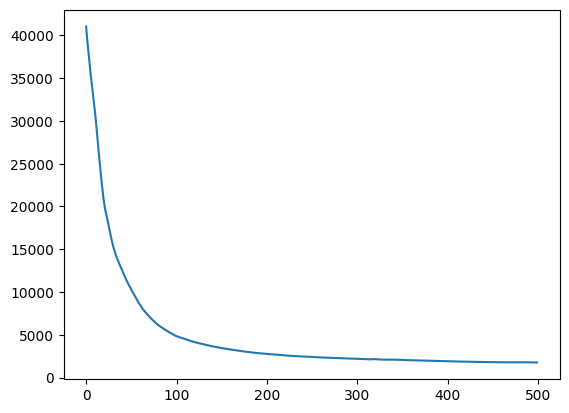

In [56]:
plt.plot(history.history['loss'])
plt.show()

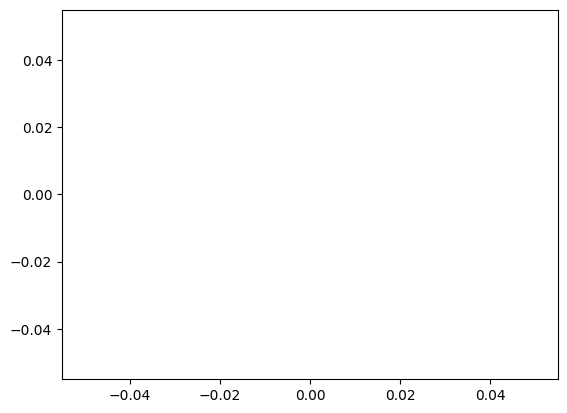

In [57]:
plt.plot(l)
plt.plot(l0)
plt.show()

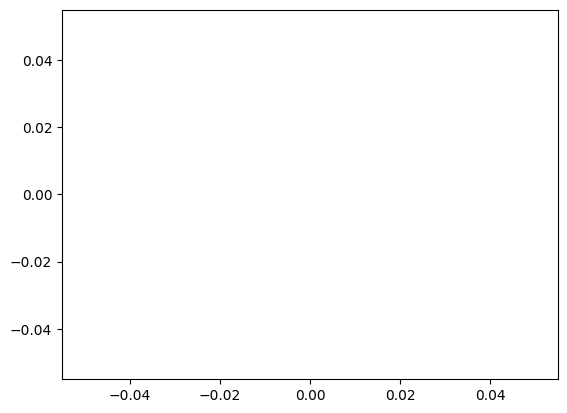

In [58]:
plt.plot(l0)

In [59]:
print(f'best epoch: {min(l0)}',f'best batch: {min(l)}')

ValueError: min() arg is an empty sequence

In [60]:
l0[-1]

IndexError: list index out of range

In [71]:
model.save('last.h5')

/home/itachi/miniconda3/envs/kera/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [72]:
data[index]

array([[  35.,   65.,  125.,  -58., -181.,  455.],
       [-161.,  110.,  -48.,   31., -189.,  480.],
       [-168.,  151., -246.,  190., -121.,  457.],
       [ -73.,  145., -171.,  208.,  -34.,  359.],
       [ -40.,  162.,  -57.,  190.,  -20.,  297.],
       [-146.,  161., -283.,  234.,  -52.,  392.],
       [-156.,  114.,  -54.,    7., -123.,  429.]])

In [73]:
restore_changes(data[index],index,None)

[[[828.0, 635.0], [918.0, 512.0], [612.0, 1025.0]],
 [[625.0, 676.0], [738.0, 597.0], [597.0, 1046.0]],
 [[518.0, 740.0], [440.0, 779.0], [565.0, 1046.0]],
 [[488.0, 821.0], [390.0, 884.0], [527.0, 1035.0]],
 [[488.0, 880.0], [471.0, 908.0], [508.0, 1015.0]],
 [[449.0, 817.0], [312.0, 890.0], [543.0, 1048.0]],
 [[558.0, 689.0], [660.0, 582.0], [591.0, 1004.0]]]

In [74]:
# import cv2
# img=cv2.imread('CutFrame_Output/output0/frame_0.png')
# from utils import process_data
# import re
# from utils import list_change
# 
# data = process_data(r'CutFrame_Output/output0/use0.txt')
# data1 = list_change(r'CutFrame_Output/output0/use0.txt')
# print(data)
# print(data1)
# for p in data:
#     # print((p[0], p[1]))
#     cv2.circle(img, (int(p[0]), int(p[1])), 3, (0, 255, 0), -1)
# 
# for p in data1:
#     # print((p[0], p[1]))
#     cv2.circle(img, (int(p[0]), int(p[1])), 3, (0, 0, 255), -1)
# 
# cv2.imwrite('output.png', img)

In [75]:
# restore_changes(data[0],0)

In [76]:
model = tf.keras.models.load_model('last.h5')
# model.evaluate(X_test, Y_test)

inference part

In [97]:
index = 0

In [98]:
a= model.predict(np.array([data[index]]))

1/1 [==============================] - 0s 30ms/step


In [99]:
a[0]

array([[  15.06012 ,   58.88861 ,  140.8482  ,  -51.743183,  -12.972407,
         436.6947  ],
       [-146.61786 ,  109.41419 ,  -58.70793 ,   32.428978, -100.38165 ,
         483.9825  ],
       [-169.62773 ,  148.21129 , -239.49329 ,  180.54901 ,  -97.143   ,
         432.9018  ],
       [ -64.28179 ,  156.69368 , -130.29895 ,  228.03383 ,  -13.681445,
         341.03986 ],
       [ -50.64759 ,  153.88283 ,  -80.10383 ,  205.698   ,   -2.501422,
         330.46976 ],
       [-133.95367 ,  177.68604 , -247.19415 ,  275.4281  ,  -77.6651  ,
         398.00836 ],
       [-137.95638 ,  118.63602 ,  -42.65798 ,   64.76956 ,  -23.662535,
         458.53476 ]], dtype=float32)

In [100]:
data[index]

array([[  35.,   65.,  125.,  -58., -181.,  455.],
       [-161.,  110.,  -48.,   31., -189.,  480.],
       [-168.,  151., -246.,  190., -121.,  457.],
       [ -73.,  145., -171.,  208.,  -34.,  359.],
       [ -40.,  162.,  -57.,  190.,  -20.,  297.],
       [-146.,  161., -283.,  234.,  -52.,  392.],
       [-156.,  114.,  -54.,    7., -123.,  429.]])

In [101]:
points = restore_changes(a,index,None)
points_ori = restore_changes(data[index],index,None)
# points = ['pass']+points
# del(points[-1])
for n,f in enumerate(points):
    # if n==0:
    #     continue
    img = cv2.imread(f'./CutFrame_Output/output{index}/frame_{n}.png')
    for q,p in enumerate(f):
        print((p[0], p[1]))
        cv2.circle(img, (int(p[0]), int(p[1])), 3, (0, 255, 0), -1)
        cv2.putText(img, str(q), (int(p[0]), int(p[1])), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
    for q,p in enumerate(points_ori[n]):
        print((p[0], p[1]))
        cv2.circle(img, (int(p[0]), int(p[1])), 3, (255, 0, 0), -1)
        cv2.putText(img, str(q), (int(p[0]), int(p[1])), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)
    cv2.imwrite(f'outputs/output{n}.png', img)

(808.0601196289062, 628.8886108398438)
(933.8482055664062, 518.2568168640137)
(780.0275926589966, 1006.6947021484375)
(828.0, 635.0)
(918.0, 512.0)
(612.0, 1025.0)
(639.3821411132812, 675.414192199707)
(727.2920684814453, 598.4289779663086)
(685.6183471679688, 1049.9825134277344)
(625.0, 676.0)
(738.0, 597.0)
(597.0, 1046.0)
(516.3722686767578, 737.2112884521484)
(446.5067138671875, 769.5490112304688)
(588.8570022583008, 1021.9017944335938)
(518.0, 740.0)
(440.0, 779.0)
(565.0, 1046.0)
(496.7182083129883, 832.6936798095703)
(430.7010498046875, 904.0338287353516)
(547.3185548782349, 1017.0398559570312)
(488.0, 821.0)
(390.0, 884.0)
(527.0, 1035.0)
(477.35240936279297, 871.8828277587891)
(447.8961715698242, 923.697998046875)
(525.4985780715942, 1048.4697570800781)
(488.0, 880.0)
(471.0, 908.0)
(508.0, 1015.0)
(461.04632568359375, 833.68603515625)
(347.80584716796875, 931.4281005859375)
(517.3348999023438, 1054.0083618164062)
(449.0, 817.0)
(312.0, 890.0)
(543.0, 1048.0)
(576.043624877929